## Problem statement:

In this notebook we created a text classification model to recognize sentiment in text and understand sarcasm in a phrase.

In [1]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [29]:
# defining the global variables:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000
num_epochs = 15

In [4]:
!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/sarcasm.json \
    -O /tmp/sarcasm.json


--2023-09-14 08:38:34--  https://storage.googleapis.com/learning-datasets/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.128.207, 173.194.69.207, 173.194.79.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.128.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  9.03MB/s    in 0.6s    

2023-09-14 08:38:35 (9.03 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [5]:
with open("/tmp/sarcasm.json", "r") as f:
  datastore = json.load(f)

In [6]:
sentences = []
labels = []
#urls = []

for item in datastore:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])
  #urls.append(item['article_link'])

In [7]:
# Slicing the data set into training and testing datasets
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [1]:
# indexing the training data
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
#print(word_index)

NameError: name 'Tokenizer' is not defined

In [9]:
# turn the training senteces into sequence of tokens
training_sequences = tokenizer.texts_to_sequences(training_sentences)
# pad the training sequences witht the same length
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(training_padded[0])
print(training_padded.shape)

[ 328    1  799 3405 2404   47  389 2214    1    6 2614 8863    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]
(20000, 100)


In [10]:
# turn the testing senteces into sequence of tokens
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
# pad the testing sequences witht the same length
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(testing_padded[0])
print(testing_padded.shape)

[   1 1100 6663 9423   30    1 2439    5  519  109    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]
(6709, 100)


In [11]:
# Requirements for working with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)

testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [33]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAvgPool1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           160000    
                                                                 
 global_average_pooling1d_1  (None, 16)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_2 (Dense)             (None, 24)                408       
                                                                 
 dense_3 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160433 (626.69 KB)
Trainable params: 160433 (626.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [36]:
# training the model

history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)


Epoch 1/15
625/625 - 5s - loss: 0.6722 - accuracy: 0.5718 - val_loss: 0.6149 - val_accuracy: 0.7624 - 5s/epoch - 8ms/step
Epoch 2/15
625/625 - 4s - loss: 0.4474 - accuracy: 0.8214 - val_loss: 0.3845 - val_accuracy: 0.8402 - 4s/epoch - 6ms/step
Epoch 3/15
625/625 - 3s - loss: 0.3122 - accuracy: 0.8763 - val_loss: 0.3594 - val_accuracy: 0.8457 - 3s/epoch - 5ms/step
Epoch 4/15
625/625 - 4s - loss: 0.2600 - accuracy: 0.8989 - val_loss: 0.3423 - val_accuracy: 0.8575 - 4s/epoch - 7ms/step
Epoch 5/15
625/625 - 3s - loss: 0.2247 - accuracy: 0.9136 - val_loss: 0.3445 - val_accuracy: 0.8568 - 3s/epoch - 6ms/step
Epoch 6/15
625/625 - 4s - loss: 0.1989 - accuracy: 0.9238 - val_loss: 0.3501 - val_accuracy: 0.8521 - 4s/epoch - 6ms/step
Epoch 7/15
625/625 - 4s - loss: 0.1768 - accuracy: 0.9343 - val_loss: 0.3598 - val_accuracy: 0.8520 - 4s/epoch - 6ms/step
Epoch 8/15
625/625 - 4s - loss: 0.1581 - accuracy: 0.9410 - val_loss: 0.3722 - val_accuracy: 0.8530 - 4s/epoch - 6ms/step
Epoch 9/15
625/625 - 3s 

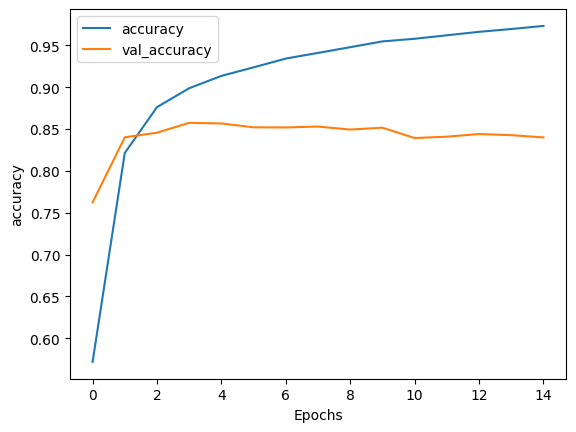

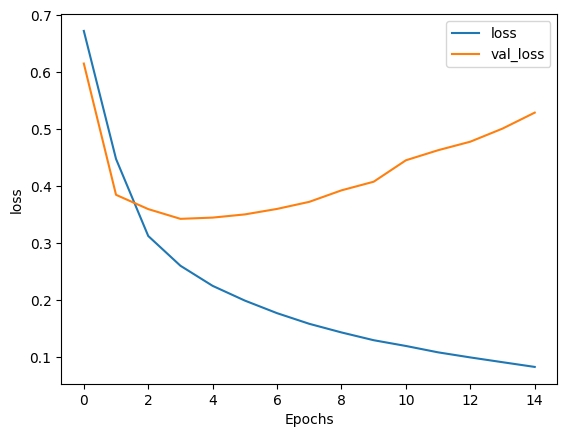

In [37]:
import matplotlib.pyplot as plt
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

## Insights:
As we can see the accuracy and the validationa accuracy, they both are increasing. The val_accuracy for the number of given epochs is acceptable. Moreover, although the validation loss starts growing at the end but in this model the results are justifiable regarding the test environment.

In [41]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
  return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])

former <OOV> store clerk sues over secret 'black <OOV> for minority shoppers ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
mom starting to fear son's web series closest thing she will have to grandchild
1


In [43]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)


(10000, 16)


In [47]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf_8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  #word = reverse_word_index[word_num]
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word+"\n")
  out_v.write('\t'.join([str(x) for x in embeddings])+ "\n")
out_v.close()
out_m.close()

In [48]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [86]:
sentence = ["granny starting to fear spiders in the garden might be real","Today I am going to the cinema to watch a new movie."]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

1/1 [==============================] - 0s 31ms/step
[[0.9220114 ]
 [0.00310857]]


## Conclusion:

The model is designed to detect sarcasm in a sentence. The results show the probability of the first phrase being sarcastic is very close to 1. However, the second one is not really sarcastic.